# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [13]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [10]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
lat_mais = sinasc_raw[sinasc_raw['munResLat']> -10.5]
lat_menos = sinasc_raw[sinasc_raw['munResLat']< -10.5]

In [5]:
lat_mais.groupby('munResLat')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])

<ipython-input-5-7e9813b704c3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  lat_mais.groupby('munResLat')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])


CONSULTAS                                              QTDFILMORT  \
                sum      mean min max median       std       var        sum   
munResLat                                                                     
-10.43595      3368  3.822928   1   9      4  0.531269  0.282246      204.0   
-10.43105       304  3.753086   2   4      4  0.513100  0.263272       17.0   
-10.41177      1459  3.377315   1   9      4  0.918358  0.843382      127.0   
-10.33887       278  3.706667   1   4      4  0.587559  0.345225       15.0   
-10.26310       721  3.623116   1   4      4  0.606087  0.367342       47.0   
-10.24873       360  3.711340   1   4      4  0.644831  0.415808       22.0   
-10.20981      2204  3.780446   1   4      4  0.524154  0.274737      134.0   
-9.90846       6340  3.666859   1   4      4  0.619004  0.383166      418.0   
-9.85139        347  3.731183   1   4      4  0.645044  0.416082       14.0   
-9.71667        835  3.694690   1   4      4  0.632222  0.399705       54.0   
-9.70554        184  3.680000   2   4      4  0.512696  0.262857       15.0   
-9.42556       1832  3.664000   1   9      4  0.692867  0.480064      114.0   
-9.37819        746  3.639024   1   4      4  0.661578  0.437685       48.0   
-9.19187        399  3.660550   1   4      4  0.830218  0.689263       27.0   
-8.78502       1163  3.451039   1   9      4  0.993194  0.986435       91.0   
-8.76889      28122  3.333175   1   9      4  0.982206  0.964728     2191.0   

                                                          
               mean  min  max median       std       var  
munResLat                                                 
-10.43595  0.233677  0.0  4.0    0.0  0.554723  0.307718  
-10.43105  0.215190  0.0  3.0    0.0  0.523080  0.273612  
-10.41177  0.332461  0.0  6.0    0.0  0.747309  0.558471  
-10.33887  0.202703  0.0  3.0    0.0  0.496004  0.246020  
-10.26310  0.251337  0.0  4.0    0.0  0.573553  0.328963  
-10.24873  0.231579  0.0  3.0    0.0  0.554529  0.307503  
-10.20981  0.623256  0.0  6.0    0.0  0.815973  0.665812  
-9.90846   0.243448  0.0  5.0    0.0  0.565231  0.319486  
-9.85139   0.152174  0.0  2.0    0.0  0.443135  0.196369  
-9.71667   0.248848  0.0  3.0    0.0  0.595361  0.354455  
-9.70554   0.319149  0.0  2.0    0.0  0.515262  0.265495  
-9.42556   0.238994  0.0  9.0    0.0  0.659059  0.434359  
-9.37819   0.238806  0.0  3.0    0.0  0.531683  0.282687  
-9.19187   0.275510  0.0  2.0    0.0  0.533044  0.284136  
-8.78502   0.304348  0.0  5.0    0.0  0.588777  0.346659  
-8.76889   0.309770  0.0  9.0    0.0  0.644580  0.415483

In [6]:
lat_menos.groupby('munResLat')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])

<ipython-input-6-7ee6d74646c6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  lat_menos.groupby('munResLat')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])


CONSULTAS                                              QTDFILMORT  \
                sum      mean min max median       std       var        sum   
munResLat                                                                     
-13.49976       310  3.875000   2   4      4  0.401737  0.161392       21.0   
-13.47656       144  3.600000   1   4      4  0.744208  0.553846        7.0   
-13.19503       889  3.751055   1   4      4  0.545833  0.297933       70.0   
-13.13056       794  3.710280   1   4      4  0.612995  0.375762       55.0   
-12.99752       489  3.850394   1   4      4  0.437865  0.191726       24.0   
-12.74137      6004  3.776101   1   9      4  0.636765  0.405470      398.0   
-12.55684       591  3.648148   2   4      4  0.551364  0.304003       31.0   
-12.43601       873  3.746781   1   4      4  0.549530  0.301983       59.0   
-12.17983       152  3.454545   1   4      4  0.819942  0.672304        4.0   
-12.13178       578  3.753247   1   4      4  0.597508  0.357016       27.0   
-12.06380      1154  3.808581   2   9      4  0.548622  0.300986       83.0   
-11.93554      1336  3.640327   1   4      4  0.628388  0.394872       73.0   
-11.91439       201  3.722222   1   4      4  0.596109  0.355346        5.0   
-11.90842       374  3.777778   1   4      4  0.581265  0.337868       19.0   
-11.82571       164  3.813953   2   4      4  0.450175  0.202658        9.0   
-11.76712       640  3.809524   1   4      4  0.524289  0.274879       39.0   
-11.72226      3395  3.662352   1   4      4  0.672923  0.452825      239.0   
-11.72133       984  3.770115   1   4      4  0.473152  0.223873       49.0   
-11.70974       357  3.642857   1   4      4  0.802702  0.644330       32.0   
-11.69949      1318  3.733711   1   4      4  0.551261  0.303889       84.0   
-11.67754      2296  3.727273   1   4      4  0.538263  0.289727      124.0   
-11.52855      1621  3.602222   1   4      4  0.653580  0.427167       96.0   
-11.43387      5131  3.734352   1   4      4  0.541126  0.292818      338.0   
-11.42684       118  3.687500   2   4      4  0.592289  0.350806        3.0   
-11.34413       743  3.624390   1   4      4  0.754328  0.569010       37.0   
-11.19624       309  3.678571   2   4      4  0.494810  0.244836       29.0   
-11.17321      1150  3.782895   1   9      4  0.678941  0.460961       70.0   
-11.12855       642  3.776471   1   9      4  0.727750  0.529621       42.0   
-11.04561       620  3.780488   1   4      4  0.520132  0.270537       44.0   
-10.93217       248  3.875000   1   4      4  0.487950  0.238095       13.0   
-10.91553       392  3.769231   1   4      4  0.578427  0.334578       13.0   
-10.88205      8149  3.734647   1   9      4  0.603885  0.364677      493.0   
-10.77388      2422  3.101152   1   9      3  0.910768  0.829499      242.0   
-10.72357      2371  3.757528   1   9      4  0.622210  0.387146      169.0   
-10.61207       425  3.794643   1   4      4  0.486547  0.236728       20.0   
-10.56842       616  3.710843   1   4      4  0.540036  0.291639       44.0   

                                                           
               mean  min   max median       std       var  
munResLat                                                  
-13.49976  0.262500  0.0   2.0    0.0  0.568002  0.322627  
-13.47656  0.175000  0.0   1.0    0.0  0.384808  0.148077  
-13.19503  0.303030  0.0   3.0    0.0  0.592665  0.351252  
-13.13056  0.257009  0.0   3.0    0.0  0.551841  0.304528  
-12.99752  0.190476  0.0   3.0    0.0  0.451031  0.203429  
-12.74137  0.251580  0.0  28.0    0.0  0.874790  0.765257  
-12.55684  0.193750  0.0   3.0    0.0  0.495221  0.245244  
-12.43601  0.261062  0.0   6.0    0.0  0.631039  0.398210  
-12.17983  0.095238  0.0   1.0    0.0  0.297102  0.088269  
-12.13178  0.181208  0.0   3.0    0.0  0.465770  0.216942  
-12.06380  0.278523  0.0   5.0    0.0  0.635331  0.403645  
-11.93554  0.201102  0.0   3.0    0.0  0.465137  0.216352  
-11.91439  0.094340  0.0   2

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
cod_mais = sinasc_raw[sinasc_raw['munResArea']> 3000]
cod_menos = sinasc_raw[sinasc_raw['munResArea']< 3000]

In [8]:
cod_mais.groupby('munResArea')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])

<ipython-input-8-8aa72b0a2a50>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cod_mais.groupby('munResArea')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])


CONSULTAS                                              QTDFILMORT  \
                 sum      mean min max median       std       var        sum   
munResArea                                                                     
3029.189         743  3.624390   1   4      4  0.754328  0.569010       37.0   
3060.321         489  3.850394   1   4      4  0.437865  0.191726       24.0   
3135.106         347  3.731183   1   4      4  0.645044  0.416082       14.0   
3265.809        2204  3.780446   1   4      4  0.524154  0.274737      134.0   
3442.005         616  3.710843   1   4      4  0.540036  0.291639       44.0   
3773.505         640  3.809524   1   4      4  0.524289  0.274879       39.0   
3792.998        5131  3.734352   1   4      4  0.541126  0.292818      338.0   
3863.943         746  3.639024   1   4      4  0.661578  0.437685       48.0   
3958.273         578  3.753247   1   4      4  0.597508  0.357016       27.0   
4081.583         399  3.660550   1   4      4  0.830218  0.689263       27.0   
4426.571        6340  3.666859   1   4      4  0.619004  0.383166      418.0   
4518.035        1621  3.602222   1   4      4  0.653580  0.427167       96.0   
4987.177         873  3.746781   1   4      4  0.549530  0.301983       59.0   
5067.384         425  3.794643   1   4      4  0.486547  0.236728       20.0   
5126.723         591  3.648148   2   4      4  0.551364  0.304003       31.0   
6014.733         144  3.600000   1   4      4  0.744208  0.553846        7.0   
6240.932        2296  3.727273   1   4      4  0.538263  0.289727      124.0   
6843.868        1163  3.451039   1   9      4  0.993194  0.986435       91.0   
6896.648        8149  3.734647   1   9      4  0.603885  0.364677      493.0   
7067.025        1336  3.640327   1   4      4  0.628388  0.394872       73.0   
7460.219        1318  3.733711   1   4      4  0.551261  0.303889       84.0   
8509.270        1832  3.664000   1   9      4  0.692867  0.480064      114.0   
10071.643       1459  3.377315   1   9      4  0.918358  0.843382      127.0   
10959.767       1154  3.808581   2   9      4  0.548622  0.300986       83.0   
11518.915       6004  3.776101   1   9      4  0.636765  0.405470      398.0   
24855.724       2422  3.101152   1   9      3  0.910768  0.829499      242.0   
34096.394      28122  3.333175   1   9      4  0.982206  0.964728     2191.0   

                                                            
                mean  min   max median       std       var  
munResArea                                                  
3029.189    0.183168  0.0   2.0    0.0  0.436077  0.190163  
3060.321    0.190476  0.0   3.0    0.0  0.451031  0.203429  
3135.106    0.152174  0.0   2.0    0.0  0.443135  0.196369  
3265.809    0.623256  0.0   6.0    0.0  0.815973  0.665812  
3442.005    0.396396  0.0   3.0    0.0  0.622010  0.386896  
3773.505    0.233533  0.0   4.0    0.0  0.580259  0.336700  
3792.998    0.246896  0.0   5.0    0.0  0.558395  0.311805  
3863.943    0.238806  0.0   3.0    0.0  0.531683  0.282687  
3958.273    0.181208  0.0   3.0    0.0  0.465770  0.216942  
4081.583    0.275510  0.0   2.0    0.0  0.533044  0.284136  
4426.571    0.243448  0.0   5.0    0.0  0.565231  0.319486  
4518.035    0.216216  0.0   3.0    0.0  0.531711  0.282716  
4987.177    0.261062  0.0   6.0    0.0  0.631039  0.398210  
5067.384    0.185185  0.0   2.0    0.0  0.476517  0.227068  
5126.723    0.193750  0.0   3.0    0.0  0.495221  0.245244  
6014.733    0.175000  0.0   1.0    0.0  0.384808  0.148077  
6240.932    0.205980  0.0   4.0    0.0  0.483433  0.233708  
6843.868    0.304348  0.0   5.0    0.0  0.588777  0.346659  
6896.648    0.227608  0.0   3.0    0.0  0.525906  0.276577  
7067.025    0.201102  0.0   3.0    0.0  0.465137  0.216352  
7460.219    0.240688  0.0   3.0    0.0  0.496488  0.246501  
8509.270    0.238994  0.0   9.0    0.0  0.659059  0.434359  
10071.643   0.332461  0.0   6.0    0.0  0.747309  0.558471  
10959.767   0.278523  0.

In [9]:
cod_menos.groupby('munResArea')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])

<ipython-input-9-6f1a5422ec0f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cod_menos.groupby('munResArea')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])


CONSULTAS                                              QTDFILMORT  \
                 sum      mean min max median       std       var        sum   
munResArea                                                                     
459.978          248  3.875000   1   4      4  0.487950  0.238095       13.0   
541.647          201  3.722222   1   4      4  0.596109  0.355346        5.0   
605.692          164  3.813953   2   4      4  0.450175  0.202658        9.0   
798.083          309  3.678571   2   4      4  0.494810  0.244836       29.0   
807.126          392  3.769231   1   4      4  0.578427  0.334578       13.0   
831.857          642  3.776471   1   9      4  0.727750  0.529621       42.0   
843.446          357  3.642857   1   4      4  0.802702  0.644330       32.0   
892.842          118  3.687500   2   4      4  0.592289  0.350806        3.0   
965.676          304  3.753086   2   4      4  0.513100  0.263272       17.0   
1191.875         620  3.780488   1   4      4  0.520132  0.270537       44.0   
1197.796         374  3.777778   1   4      4  0.581265  0.337868       19.0   
1314.352         310  3.875000   2   4      4  0.401737  0.161392       21.0   
1451.060         794  3.710280   1   4      4  0.612995  0.375762       55.0   
1457.888        3395  3.662352   1   4      4  0.672923  0.452825      239.0   
1703.008         984  3.770115   1   4      4  0.473152  0.223873       49.0   
1717.640         184  3.680000   2   4      4  0.512696  0.262857       15.0   
1758.465        1150  3.782895   1   9      4  0.678941  0.460961       70.0   
1931.378         721  3.623116   1   4      4  0.606087  0.367342       47.0   
1961.778         278  3.706667   1   4      4  0.587559  0.345225       15.0   
1969.850        2371  3.757528   1   9      4  0.622210  0.387146      169.0   
2197.413         360  3.711340   1   4      4  0.644831  0.415808       22.0   
2548.683         152  3.454545   1   4      4  0.819942  0.672304        4.0   
2651.822         835  3.694690   1   4      4  0.632222  0.399705       54.0   
2783.300         889  3.751055   1   4      4  0.545833  0.297933       70.0   
2944.128        3368  3.822928   1   9      4  0.531269  0.282246      204.0   

                                                           
                mean  min  max median       std       var  
munResArea                                                 
459.978     0.203125  0.0  2.0    0.0  0.477417  0.227927  
541.647     0.094340  0.0  2.0    0.0  0.354322  0.125544  
605.692     0.209302  0.0  2.0    0.0  0.465891  0.217054  
798.083     0.345238  0.0  2.0    0.0  0.611024  0.373351  
807.126     0.126214  0.0  2.0    0.0  0.361902  0.130973  
831.857     0.247059  0.0  2.0    0.0  0.496279  0.246293  
843.446     0.329897  0.0  3.0    0.0  0.640990  0.410868  
892.842     0.093750  0.0  1.0    0.0  0.296145  0.087702  
965.676     0.215190  0.0  3.0    0.0  0.523080  0.273612  
1191.875    0.271605  0.0  3.0    0.0  0.557553  0.310866  
1197.796    0.193878  0.0  2.0    0.0  0.468781  0.219756  
1314.352    0.262500  0.0  2.0    0.0  0.568002  0.322627  
1451.060    0.257009  0.0  3.0    0.0  0.551841  0.304528  
1457.888    0.260065  0.0  4.0    0.0  0.578146  0.334253  
1703.008    0.189922  0.0  3.0    0.0  0.489953  0.240054  
1717.640    0.319149  0.0  2.0    0.0  0.515262  0.265495  
1758.465    0.232558  0.0  4.0    0.0  0.528271  0.279070  
1931.378    0.251337  0.0  4.0    0.0  0.573553  0.328963  
1961.778    0.202703  0.0  3.0    0.0  0.496004  0.246020  
1969.850    0.270833  0.0  3.0    0.0  0.582281  0.339052  
2197.413    0.231579  0.0  3.0    0.0  0.554529  0.307503  
2548.683    0.095238  0.0  1.0    0.0  0.297102  0.088269  
2651.822    0.248848  0.0  3.0    0.0  0.595361  0.354455  
2783.300    0.303030  0.0  3.0    0.0  0.592665  0.351252  
2944.128    0.233677  0.0  4.0    0.0  0.554723  0.307718

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [18]:
alt_mais = sinasc_raw[sinasc_raw['munResAlt']> 200]
alt_menos = sinasc_raw[sinasc_raw['munResAlt']< 200]

In [20]:
alt_mais.groupby('munResAlt')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])

<ipython-input-20-e1dbfe13f6f8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  alt_mais.groupby('munResAlt')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])


CONSULTAS                                              QTDFILMORT  \
                sum      mean min max median       std       var        sum   
munResAlt                                                                     
202.0           425  3.794643   1   4      4  0.486547  0.236728       20.0   
206.0           616  3.710843   1   4      4  0.540036  0.291639       44.0   
212.0           620  3.780488   1   4      4  0.520132  0.270537       44.0   
215.0           118  3.687500   2   4      4  0.592289  0.350806        3.0   
227.0          3395  3.662352   1   4      4  0.672923  0.452825      239.0   
230.0           357  3.642857   1   4      4  0.802702  0.644330       32.0   
236.0           310  3.875000   2   4      4  0.401737  0.161392       21.0   
241.0           392  3.769231   1   4      4  0.578427  0.334578       13.0   
245.0           164  3.813953   2   4      4  0.450175  0.202658        9.0   
252.0          2371  3.757528   1   9      4  0.622210  0.387146      169.0   
259.0           984  3.770115   1   4      4  0.473152  0.223873       49.0   
263.0          2510  3.653566   1   4      4  0.622171  0.387097      166.0   
265.0           374  3.777778   1   4      4  0.581265  0.337868       19.0   
266.0           309  3.678571   2   4      4  0.494810  0.244836       29.0   
269.0           489  3.850394   1   4      4  0.437865  0.191726       24.0   
270.0           201  3.722222   1   4      4  0.596109  0.355346        5.0   
296.0           152  3.454545   1   4      4  0.819942  0.672304        4.0   
338.0          1336  3.640327   1   4      4  0.628388  0.394872       73.0   
340.0           591  3.648148   2   4      4  0.551364  0.304003       31.0   
397.0           578  3.753247   1   4      4  0.597508  0.357016       27.0   
419.0           794  3.710280   1   4      4  0.612995  0.375762       55.0   
595.0          6004  3.776101   1   9      4  0.636765  0.405470      398.0   

                                                           
               mean  min   max median       std       var  
munResAlt                                                  
202.0      0.185185  0.0   2.0    0.0  0.476517  0.227068  
206.0      0.396396  0.0   3.0    0.0  0.622010  0.386896  
212.0      0.271605  0.0   3.0    0.0  0.557553  0.310866  
215.0      0.093750  0.0   1.0    0.0  0.296145  0.087702  
227.0      0.260065  0.0   4.0    0.0  0.578146  0.334253  
230.0      0.329897  0.0   3.0    0.0  0.640990  0.410868  
236.0      0.262500  0.0   2.0    0.0  0.568002  0.322627  
241.0      0.126214  0.0   2.0    0.0  0.361902  0.130973  
245.0      0.209302  0.0   2.0    0.0  0.465891  0.217054  
252.0      0.270833  0.0   3.0    0.0  0.582281  0.339052  
259.0      0.189922  0.0   3.0    0.0  0.489953  0.240054  
263.0      0.245926  0.0   3.0    0.0  0.554422  0.307383  
265.0      0.193878  0.0   2.0    0.0  0.468781  0.219756  
266.0      0.345238  0.0   2.0    0.0  0.611024  0.373351  
269.0      0.190476  0.0   3.0    0.0  0.451031  0.203429  
270.0      0.094340  0.0   2.0    0.0  0.354322  0.125544  
296.0      0.095238  0.0   1.0    0.0  0.297102  0.088269  
338.0      0.201102  0.0   3.0    0.0  0.465137  0.216352  
340.0      0.193750  0.0   3.0    0.0  0.495221  0.245244  
397.0      0.181208  0.0   3.0    0.0  0.465770  0.216942  
419.0      0.257009  0.0   3.0    0.0  0.551841  0.304528  
595.0      0.251580  0.0  28.0    0.0  0.874790  0.765257

In [21]:
alt_menos.groupby('munResAlt')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])

<ipython-input-21-25f2cc0a3658>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  alt_menos.groupby('munResAlt')['CONSULTAS','QTDFILMORT'].agg(['sum','mean','min','max','median','std','var'])


CONSULTAS                                              QTDFILMORT  \
                sum      mean min max median       std       var        sum   
munResAlt                                                                     
85.0           1163  3.451039   1   9      4  0.993194  0.986435       91.0   
87.0          28122  3.333175   1   9      4  0.982206  0.964728     2191.0   
99.0            399  3.660550   1   4      4  0.830218  0.689263       27.0   
111.0           746  3.639024   1   4      4  0.661578  0.437685       48.0   
124.0           184  3.680000   2   4      4  0.512696  0.262857       15.0   
128.0           835  3.694690   1   4      4  0.632222  0.399705       54.0   
133.0          2422  3.101152   1   9      3  0.910768  0.829499      242.0   
139.0          6340  3.666859   1   4      4  0.619004  0.383166      418.0   
144.0          1832  3.664000   1   9      4  0.692867  0.480064      114.0   
145.0           873  3.746781   1   4      4  0.549530  0.301983       59.0   
151.0          1459  3.377315   1   9      4  0.918358  0.843382      127.0   
153.0          2204  3.780446   1   4      4  0.524154  0.274737      134.0   
154.0           304  3.753086   2   4      4  0.513100  0.263272       17.0   
155.0           721  3.623116   1   4      4  0.606087  0.367342       47.0   
157.0          8149  3.734647   1   9      4  0.603885  0.364677      493.0   
158.0           347  3.731183   1   4      4  0.645044  0.416082       14.0   
161.0           278  3.706667   1   4      4  0.587559  0.345225       15.0   
163.0          3368  3.822928   1   9      4  0.531269  0.282246      204.0   
166.0          1154  3.808581   2   9      4  0.548622  0.300986       83.0   
170.0           144  3.600000   1   4      4  0.744208  0.553846        7.0   
177.0          5131  3.734352   1   4      4  0.541126  0.292818      338.0   
178.0          1150  3.782895   1   9      4  0.678941  0.460961       70.0   
182.0           743  3.624390   1   4      4  0.754328  0.569010       37.0   
186.0          2936  3.744898   1   4      4  0.536032  0.287330      163.0   
191.0          1566  3.755396   1   4      4  0.543870  0.295794       97.0   
192.0           360  3.711340   1   4      4  0.644831  0.415808       22.0   
197.0           642  3.776471   1   9      4  0.727750  0.529621       42.0   

                                                          
               mean  min  max median       std       var  
munResAlt                                                 
85.0       0.304348  0.0  5.0    0.0  0.588777  0.346659  
87.0       0.309770  0.0  9.0    0.0  0.644580  0.415483  
99.0       0.275510  0.0  2.0    0.0  0.533044  0.284136  
111.0      0.238806  0.0  3.0    0.0  0.531683  0.282687  
124.0      0.319149  0.0  2.0    0.0  0.515262  0.265495  
128.0      0.248848  0.0  3.0    0.0  0.595361  0.354455  
133.0      0.315927  0.0  7.0    0.0  0.698781  0.488295  
139.0      0.243448  0.0  5.0    0.0  0.565231  0.319486  
144.0      0.238994  0.0  9.0    0.0  0.659059  0.434359  
145.0      0.261062  0.0  6.0    0.0  0.631039  0.398210  
151.0      0.332461  0.0  6.0    0.0  0.747309  0.558471  
153.0      0.623256  0.0  6.0    0.0  0.815973  0.665812  
154.0      0.215190  0.0  3.0    0.0  0.523080  0.273612  
155.0      0.251337  0.0  4.0    0.0  0.573553  0.328963  
157.0      0.227608  0.0  3.0    0.0  0.525906  0.276577  
158.0      0.152174  0.0  2.0    0.0  0.443135  0.196369  
161.0      0.202703  0.0  3.0    0.0  0.496004  0.246020  
163.0      0.233677  0.0  4.0    0.0  0.554723  0.307718  
166.0      0.278523  0.0  5.0    0.0  0.635331  0.403645  
170.0      0.175000  0.0  1.0    0.0  0.384808  0.148077  
177.0      0.246896  0.0  5.0    0.0  0.558395  0.311805  
178.0      0.232558  0.0  4.0    0.0  0.528271  0.279070  
182.0      0.183168  0.0  2.0    0.0  0.436077  0.190163  
186.0      0.211964  0.0  4.0    0.0  0.505761  0.255794  
191.0      0.234867  0.0  3.0    0.0  0.493201

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [23]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Porto Velho",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [29]:
sinasc_regiao = sinasc_raw[['IDADEMAE','munResNome']]

In [31]:
sinasc_regiao = sinasc_regiao.set_index('munResNome')

<AxesSubplot:>

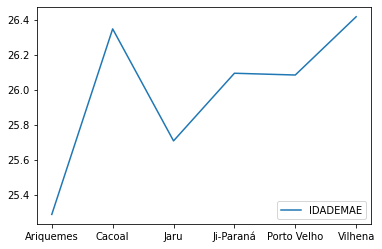

In [33]:
regiao_idademae = sinasc_regiao.groupby(imediatas).mean().plot()
regiao_idademae

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [35]:
idh_ro_2010 = {
    "Alta Floresta D'Oeste": 0.648,
    'Alto Alegre dos Parecis': 0.584,
    'Alto Paraíso': 0.573,
    "Alvorada D'Oeste": 0.604,
    'Ariquemes': 0.688,
    'Buritis': 0.599,
    'Cabixi': 0.611,
    'Cacaulândia': 0.585,
    'Cacoal': 0.713,
    'Campo Novo de Rondônia': 0.584,
    'Candeias do Jamari': 0.644,
    'Castanheiras': 0.578,
    'Cerejeiras': 0.699,
    'Chupinguaia': 0.633,
    'Colorado do Oeste': 0.645,
    'Corumbiara': 0.616,
    'Costa Marques': 0.578,
    'Cujubim': 0.564,
    "Espigão D'Oeste": 0.679,
    'Governador Jorge Teixeira': 0.588,
    'Guajará-Mirim': 0.639,
    'Itapuã do Oeste': 0.572,
    'Jaru': 0.667,
    'Ji-Paraná': 0.717,
    "Machadinho D'Oeste": 0.62,
    'Ministro Andreazza': 0.628,
    'Mirante da Serra': 0.578,
    'Monte Negro': 0.589,
    "Nova Brasilândia D'Oeste": 0.625,
    'Nova Mamoré': 0.628,
    'Nova União': 0.59,
    'Novo Horizonte do Oeste': 0.574,
    'Ouro Preto do Oeste': 0.665,
    'Parecis': 0.558,
    'Pimenta Bueno': 0.679,
    'Pimenteiras do Oeste': 0.57,
    'Porto Velho': 0.719,
    'Presidente Médici': 0.625,
    'Primavera de Rondônia': 0.576,
    'Rio Crespo': 0.555,
    'Rolim de Moura': 0.687,
    "Santa Luzia D'Oeste": 0.579,
    "São Felipe D'Oeste": 0.575,
    'São Francisco do Guaporé': 0.573,
    'São Miguel do Guaporé': 0.633,
    'Seringueiras': 0.593,
    'Teixeirópolis': 0.572,
    'Theobroma': 0.588,
    'Urupá': 0.628,
    'Vale do Anari': 0.578,
    'Vale do Paraíso': 0.585
}


In [39]:
idh_ro_2010_grupo = {}

for municipio, idh in idh_ro_2010.items():
    if idh < 0.6:
        idh_ro_2010_grupo[municipio] = "baixo"
    elif idh < 0.7:
        idh_ro_2010_grupo[municipio] = "médio"
    else:
        idh_ro_2010_grupo[municipio] = "alto"

In [44]:
sinasc_regiao.groupby(idh_ro_2010_grupo).agg(['max','min','mean'])


IDADEMAE               
           max min       mean
alto        47  12  26.387643
baixo       52  11  25.501112
médio       53  12  25.897441

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [41]:
ifdm_ro_2015 = {
    "Alta Floresta D'Oeste": 0.6794,
    "Alto Alegre dos Parecis": 0.5507,
    "Alto Paraíso": 0.5923,
    "Alvorada D'Oeste": 0.6218,
    "Ariquemes": 0.6829,
    "Buritis": 0.6053,
    "Cabixi": 0.5404,
    "Cacaulândia": 0.6206,
    "Cacoal": 0.7024,
    "Campo Novo de Rondônia": 0.5309,
    "Candeias do Jamari": 0.6406,
    "Castanheiras": 0.5695,
    "Cerejeiras": 0.6693,
    "Chupinguaia": 0.6109,
    "Colorado do Oeste": 0.5845,
    "Corumbiara": 0.5868,
    "Costa Marques": 0.5675,
    "Cujubim": 0.5633,
    "Espigão D'Oeste": 0.6307,
    "Governador Jorge Teixeira": 0.6157,
    "Guajará-Mirim": 0.5824,
    "Itapuã do Oeste": 0.5614,
    "Jaru": 0.6478,
    "Ji-Paraná": 0.6825,
    "Machadinho D'Oeste": 0.5872,
    "Ministro Andreazza": 0.5621,
    "Mirante da Serra": 0.5299,
    "Monte Negro": 0.5461,
    "Nova Brasilândia D'Oeste": 0.5606,
    "Nova Mamoré": 0.5742,
    "Nova União": 0.5571,
    "Novo Horizonte do Oeste": 0.5584,
    "Ouro Preto do Oeste": 0.6572,
    "Parecis": 0.5299,
    "Pimenta Bueno": 0.6656,
    "Pimenteiras do Oeste": 0.5556,
    "Porto Velho": 0.6866,
    "Presidente Médici": 0.5867,
    "Primavera de Rondônia": 0.5274,
    "Rio Crespo": 0.5465,
    "Rolim de Moura": 0.6446,
    "Santa Luzia D'Oeste": 0.5681,
    "São Felipe D'Oeste": 0.5549,
    "São Francisco do Guaporé": 0.5948,
    "São Miguel do Guaporé": 0.6289,
    "Seringueiras": 0.5612,
    "Teixeirópolis": 0.5649,
    "Theobroma": 0.5911,
    "Urupá": 0.5682,
    "Vale do Anari": 0.5562,
    "Vale do Paraíso": 0.5818
}



In [42]:
ifdm_ro_2015_grupo = {}

for municipio, ifdm in ifdm_ro_2015.items():
    if ifdm < 0.4:
        ifdm_ro_2015_grupo[municipio] = "baixo"
    elif ifdm < 0.6:
        ifdm_ro_2015_grupo[municipio] = "regular"
    elif ifdm < 0.8:
        ifdm_ro_2015_grupo[municipio] = "moderado"
    else:
        ifdm_ro_2015_grupo[municipio] = "alto"

In [45]:
sinasc_regiao.groupby(ifdm_ro_2015_grupo).agg(['max','min','mean'])

IDADEMAE               
              max min       mean
moderado       53  12  26.187405
regular        52  11  25.681779

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [47]:
pib_ro = {
    "Alta Floresta D'Oeste": 496000,
    "Alto Alegre dos Parecis": 213410,
    "Alto Paraíso": 358000,
    "Alvorada D'Oeste": 204098,
    "Ariquemes": 2579830,
    "Buritis": 726000,
    "Cabixi": 113031,
    "Cacaulândia": 116635,
    "Cacoal": 2261644,
    "Campo Novo de Rondônia": 208821,
    "Candeias do Jamari": 548000,
    "Castanheiras": 59779,
    "Cerejeiras": 507000,
    "Chupinguaia": 190331,
    "Colorado do Oeste": 335000,
    "Corumbiara": 188218,
    "Costa Marques": 171878,
    "Cujubim": 385000,
    "Espigão D'Oeste": 625000,
    "Governador Jorge Teixeira": 148027,
    "Guajará-Mirim": 893000,
    "Itapuã do Oeste": 129351,
    "Jaru": 1500890,
    "Ji-Paraná": 3783972,
    "Machadinho D'Oeste": 633000,
    "Ministro Andreazza": 174633,
    "Mirante da Serra": 163955,
    "Monte Negro": 219152,
    "Nova Brasilândia D'Oeste": 360000,
    "Nova Mamoré": 529000,
    "Nova União": 92346,
    "Novo Horizonte do Oeste": 129399,
    "Ouro Preto do Oeste": 834000,
    "Parecis": 80759,
    "Pimenta Bueno": 1164877,
    "Pimenteiras do Oeste": 76756,
    "Porto Velho": 17912070,
    "Presidente Médici": 428000,
    "Primavera de Rondônia": 52908,
    "Rio Crespo": 76854,
    "Rolim de Moura": 1283434,
    "Santa Luzia D'Oeste": 135934,
    "São Felipe D'Oeste": 72084,
    "São Francisco do Guaporé": 353000,
    "São Miguel do Guaporé": 616000,
    "Seringueiras": 169429,
    "Teixeirópolis": 72089,
    "Theobroma": 140601,
    "Urupá": 172143,
    "Vale do Anari": 105208,
    "Vale do Paraíso": 116742,
    "Vilhena": 2831175
}

In [50]:
pib_grupo = {}

for municipio, pib in pib_ro.items():
    if pib < 100000:
        pib_grupo[municipio] = "Até de 100M"
    elif pib < 200000:
        pib_grupo[municipio] = "Acima de 100M"
    elif pib < 300000:
        pib_grupo[municipio] = "Acima de 200M"
    elif pib < 500000:
        pib_grupo[municipio] = "Acima de 300M"
    elif pib < 1000000:
        pib_grupo[municipio] = "Acima de 500M"
    else:
        pib_grupo[municipio] = "Acima de 1B"

In [53]:
sinasc_regiao.groupby(pib_grupo).agg(['max','min','mean'])

IDADEMAE               
                   max min       mean
Acima de 100M       52  12  25.662910
Acima de 1B         47  12  26.265562
Acima de 200M       44  13  25.323204
Acima de 300M       53  11  25.833511
Acima de 500M       53  13  25.782528
Até de 100M         41  14  26.515081

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Vilhena é a região que possui a maior média de idade de mãe